<a href="https://colab.research.google.com/github/estiwmar/proyecto-final/blob/main/proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
url='https://raw.githubusercontent.com/estiwmar/proyecto-final/main/Entradas_de_extranjeros_a_Colombia_2.csv'
df = pd.read_csv('https://raw.githubusercontent.com/estiwmar/proyecto-final/main/Entradas_de_extranjeros_a_Colombia_2.csv',sep=';')


In [38]:
df.head ()

,Año,Mes,Nacionalidad,Codigo Iso 3166,Femenino,Masculino,Total
0,2012,Enero,Islas Alboran y Perejil,99999,1,0,1
1,2012,Enero,Albania,8,1,2,3
2,2012,Enero,Alemania,276,11,16,27
3,2012,Enero,Alemania,276,1,1,2
4,2012,Enero,Alemania,276,63,102,165


In [39]:
df.tail()

,Año,Mes,Nacionalidad,Codigo Iso 3166,Femenino,Masculino,Total
135035,2023,Junio,Desconocido,99999,65,82,147
135036,2023,Junio,Desconocido,99999,0,2,2
135037,2023,Junio,Desconocido,99999,0,1,1
135038,2023,Junio,Desconocido,99999,0,1,1
135039,2023,Junio,República CentroÁfricana,140,0,1,1


In [40]:
registros_con_comillas_dobles = df['Nacionalidad'].str.contains('"').sum()
registros_con_comillas_simples = df['Nacionalidad'].str.contains("'").sum()
total_registros_con_comillas = registros_con_comillas_dobles + registros_con_comillas_simples

total_registros_con_comillas

0

In [41]:
registros_con_comas = df['Nacionalidad'].str.contains(',').sum()

registros_con_comas

0

In [43]:
registros_con_punto_y_coma = df['Nacionalidad'].str.contains(';').sum()

registros_con_comas

0

In [44]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135040 entries, 0 to 135039
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Año              135040 non-null  int64 
 1   Mes              135040 non-null  object
 2   Nacionalidad     135040 non-null  object
 3   Codigo Iso 3166  135040 non-null  int64 
 4   Femenino         135040 non-null  int64 
 5   Masculino        135040 non-null  int64 
 6   Total            135040 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 7.2+ MB
None


In [45]:
num_registros = df.shape[0]
print(f"El número de registros en el dataset es: {num_registros}")

El número de registros en el dataset es: 135040


In [46]:
print(df.isnull().sum())

Año                0
Mes                0
Nacionalidad       0
Codigo Iso 3166    0
Femenino           0
Masculino          0
Total              0
dtype: int64


Todas las filas del conjunto de datos contienen valores

In [48]:
pd.unique(df['Nacionalidad'])

array(['Islas Alboran y Perejil', 'Albania', 'Alemania', 'Andorra',
       'Angola', 'Antigua y Barbuda', 'Países Bajos', 'Argelia',
       'Argentina', 'Aruba', 'Australia', 'Austria', 'Azerbaiyán',
       'Bahamas', 'Bahréin', 'Bangladesh', 'Barbados',
       'República de Belarús', 'Bélgica', 'Belice',
       'Bermudas/Territorio Británico de Ultramar', 'Bolivia',
       'Bosnia y Herzegovina', 'Botsuana', 'Brasil', 'Bulgaria',
       'Burkina Faso', 'Islas Caimán/Territorio Británico de Ultramar',
       'Camerún', 'Canadá', 'Chad', 'España',
       'República Democrática del Congo', 'República de Corea',
       'Costa de Marfil', 'Costa Rica', 'Croacia', 'Cuba', 'Curazao',
       'República Checa', 'Chile', 'China', 'Taiwán', 'Chipre',
       'Dinamarca', 'Dominica', 'Ecuador', 'Egipto', 'El Salvador',
       'Eslovaquia', 'Eslovenia', 'Estados Unidos de América', 'Estonia',
       'Etiopia', 'Filipinas', 'Finlandia', 'Francia', 'Gabón', 'Georgia',
       'Ghana', 'Granada', 'Grec

In [49]:
column_rename_map = {
    "Codigo Iso 3166": "Codigo_Pais",
}
df_renombrado = df.rename(columns=column_rename_map)

In [50]:
df_renombrado.head()

,Año,Mes,Nacionalidad,Codigo_Pais,Femenino,Masculino,Total
0,2012,Enero,Islas Alboran y Perejil,99999,1,0,1
1,2012,Enero,Albania,8,1,2,3
2,2012,Enero,Alemania,276,11,16,27
3,2012,Enero,Alemania,276,1,1,2
4,2012,Enero,Alemania,276,63,102,165


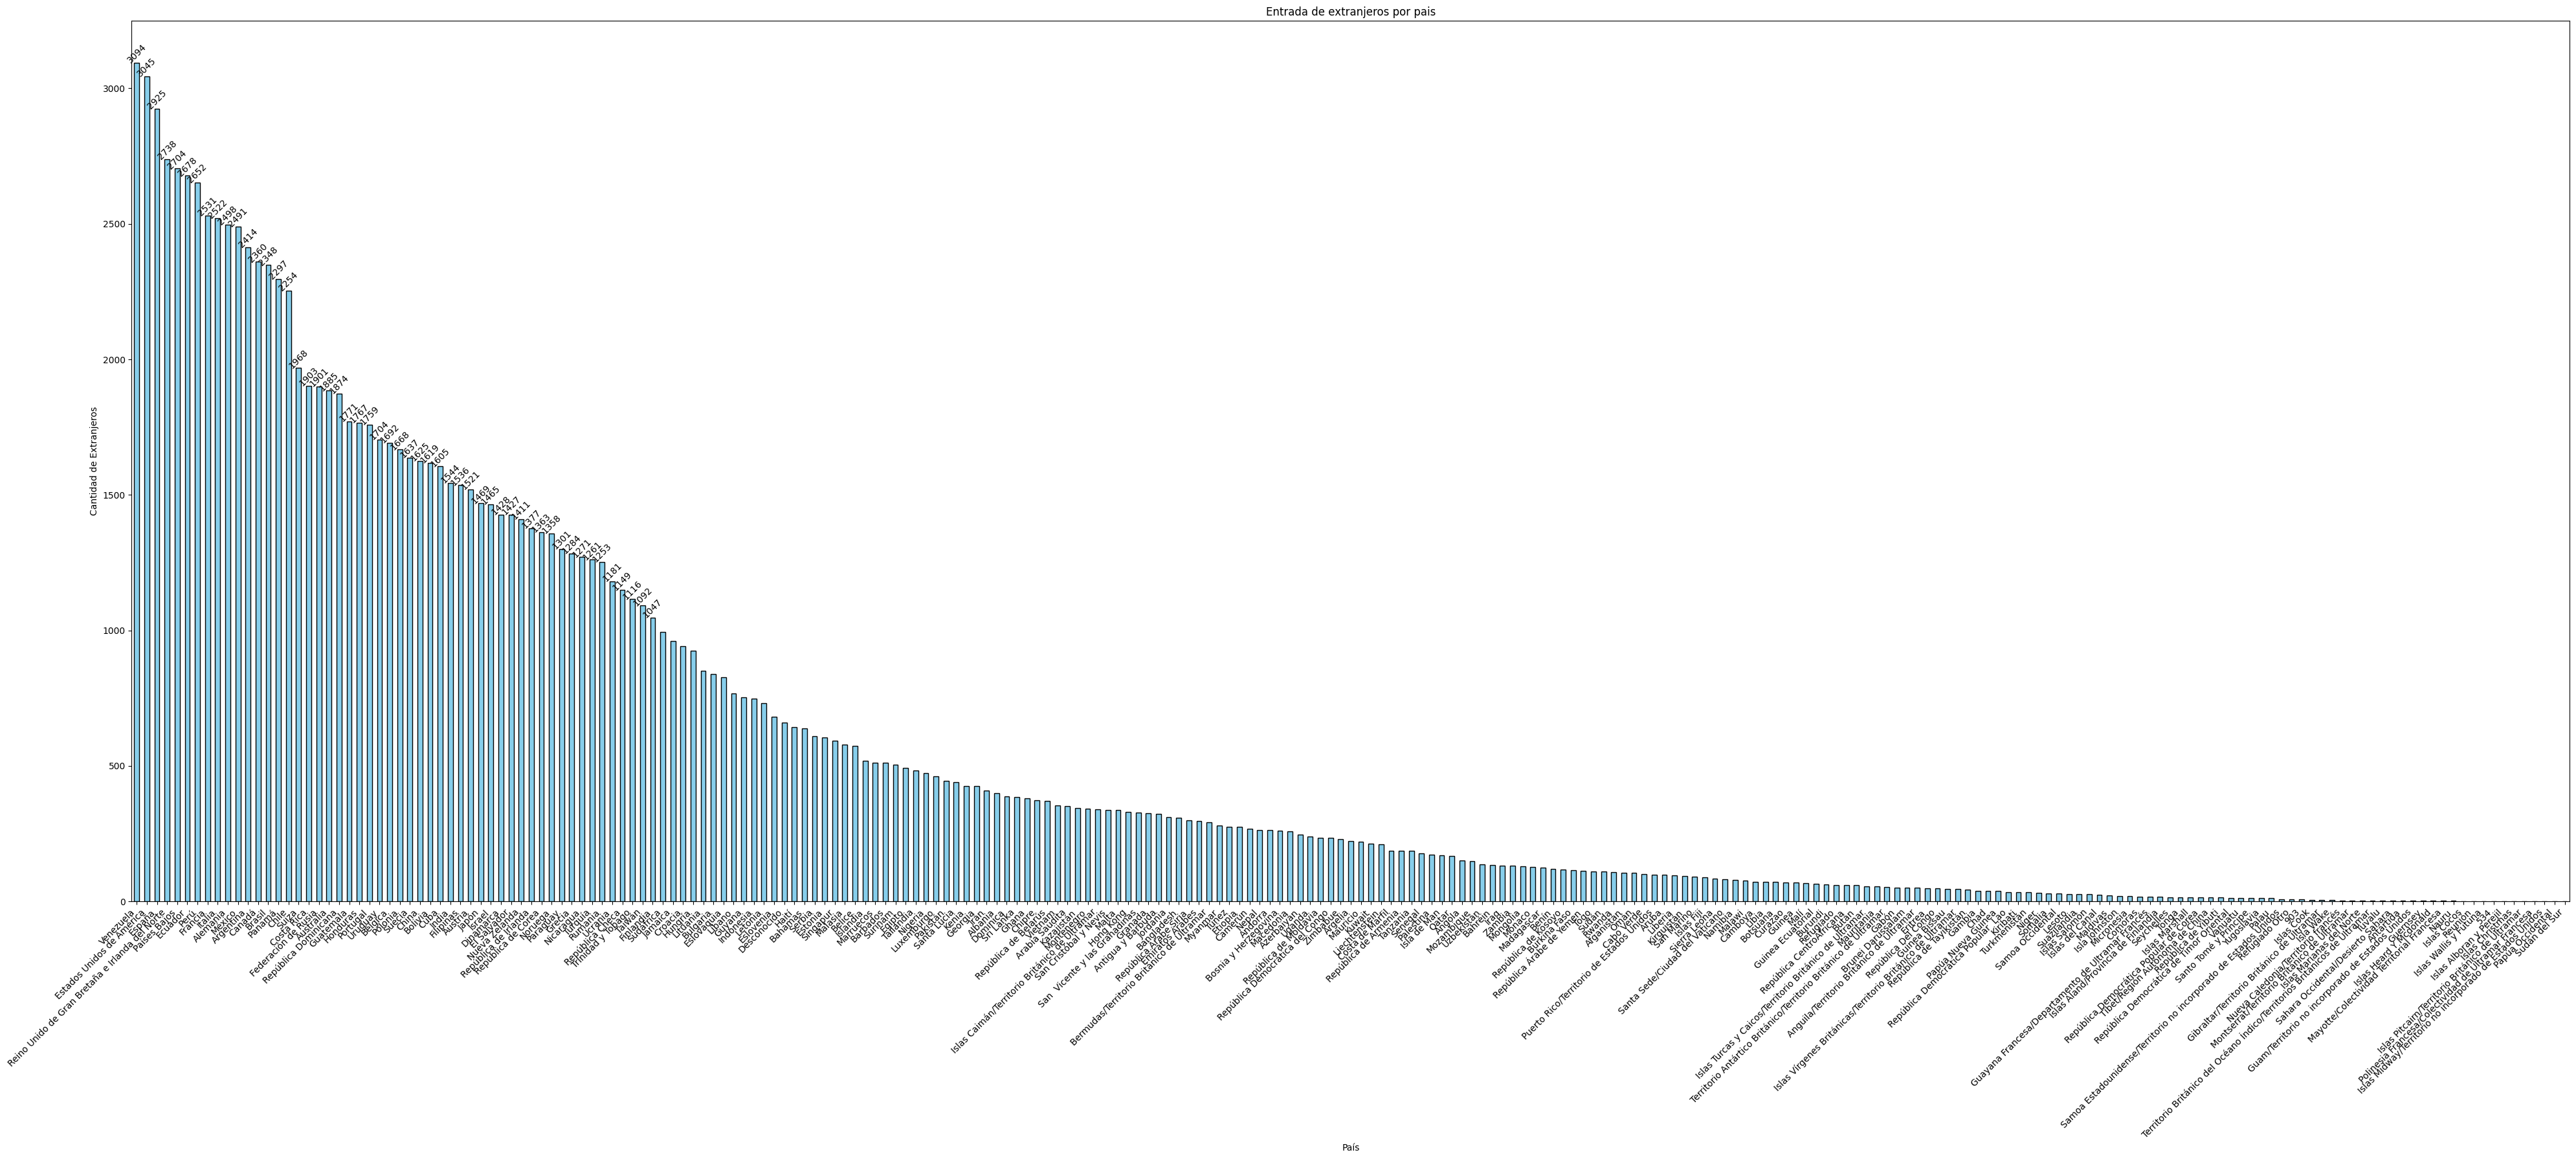

In [51]:
plt.figure(figsize=(40, 18))
extranjeros_x_pais = df_renombrado['Nacionalidad'].value_counts()
ax = extranjeros_x_pais.plot(kind='bar', color='skyblue', edgecolor='black')
umbral = 1000
for p in ax.patches:
    if p.get_height() > umbral:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation=45)
plt.xticks(rotation=45, ha='right')
plt.title('Entrada de extranjeros por pais')
plt.xlabel('País')
plt.ylabel('Cantidad de Extranjeros')
plt.tight_layout()
plt.show()

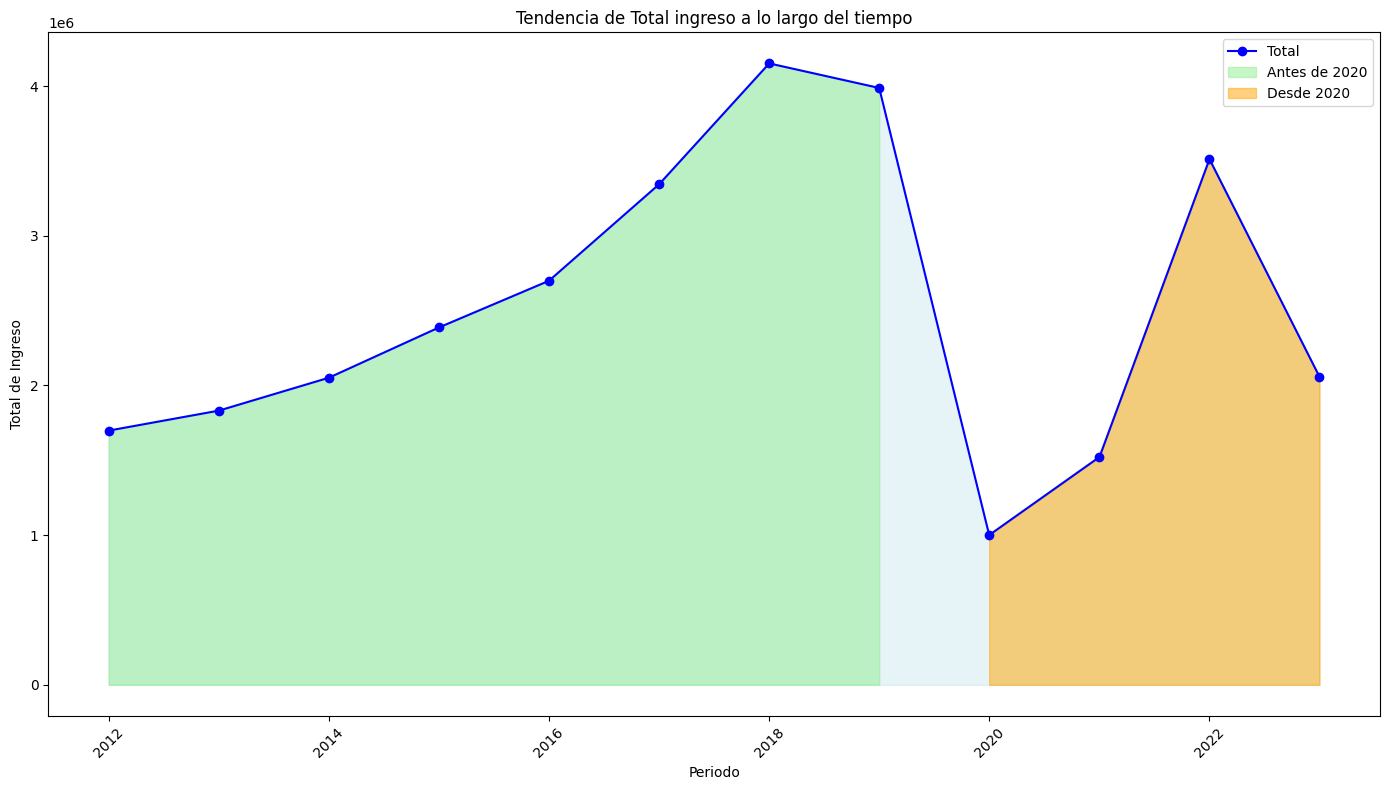

In [56]:
df_renombrado['Año'] = pd.to_datetime(df_renombrado['Año'], format='%Y')
tendencias_temporales = df_renombrado.groupby('Año')['Total'].sum().reset_index()

plt.figure(figsize=(14, 8))
plt.plot(tendencias_temporales['Año'], tendencias_temporales['Total'], marker='o', linestyle='-', color='blue', label='Total')

plt.fill_between(tendencias_temporales['Año'], tendencias_temporales['Total'], color='lightblue', alpha=0.3)
plt.fill_between(tendencias_temporales['Año'], 0, tendencias_temporales['Total'], where=(tendencias_temporales['Año'] < '2020'), color='lightgreen', alpha=0.5, label='Antes de 2020')
plt.fill_between(tendencias_temporales['Año'], 0, tendencias_temporales['Total'], where=(tendencias_temporales['Año'] >= '2020'), color='orange', alpha=0.5, label='Desde 2020')

plt.title('Tendencia de Total ingreso a lo largo del tiempo')
plt.xlabel('Periodo')
plt.ylabel('Total de Ingreso')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfica de Tendencia Temporal
- Desde el 2012 al 2018 vemos un aumento mas que duplicado de Ingreso de extranjeros con una leve caída en el 2019, pero que pasa de los 4 millones por año.
- En 2020 se refleja una fuerte caida por efecto del Covid-19 pero vuelve a Incrementarse en 2021 por reactivación y en 2022 con una recuperación de mas del 80% con respecto al 2018.
- Según el dato reflejado al primer semestre del 2023 la tendencia es a superar de nuevo los 4 millones de ingreso por año.

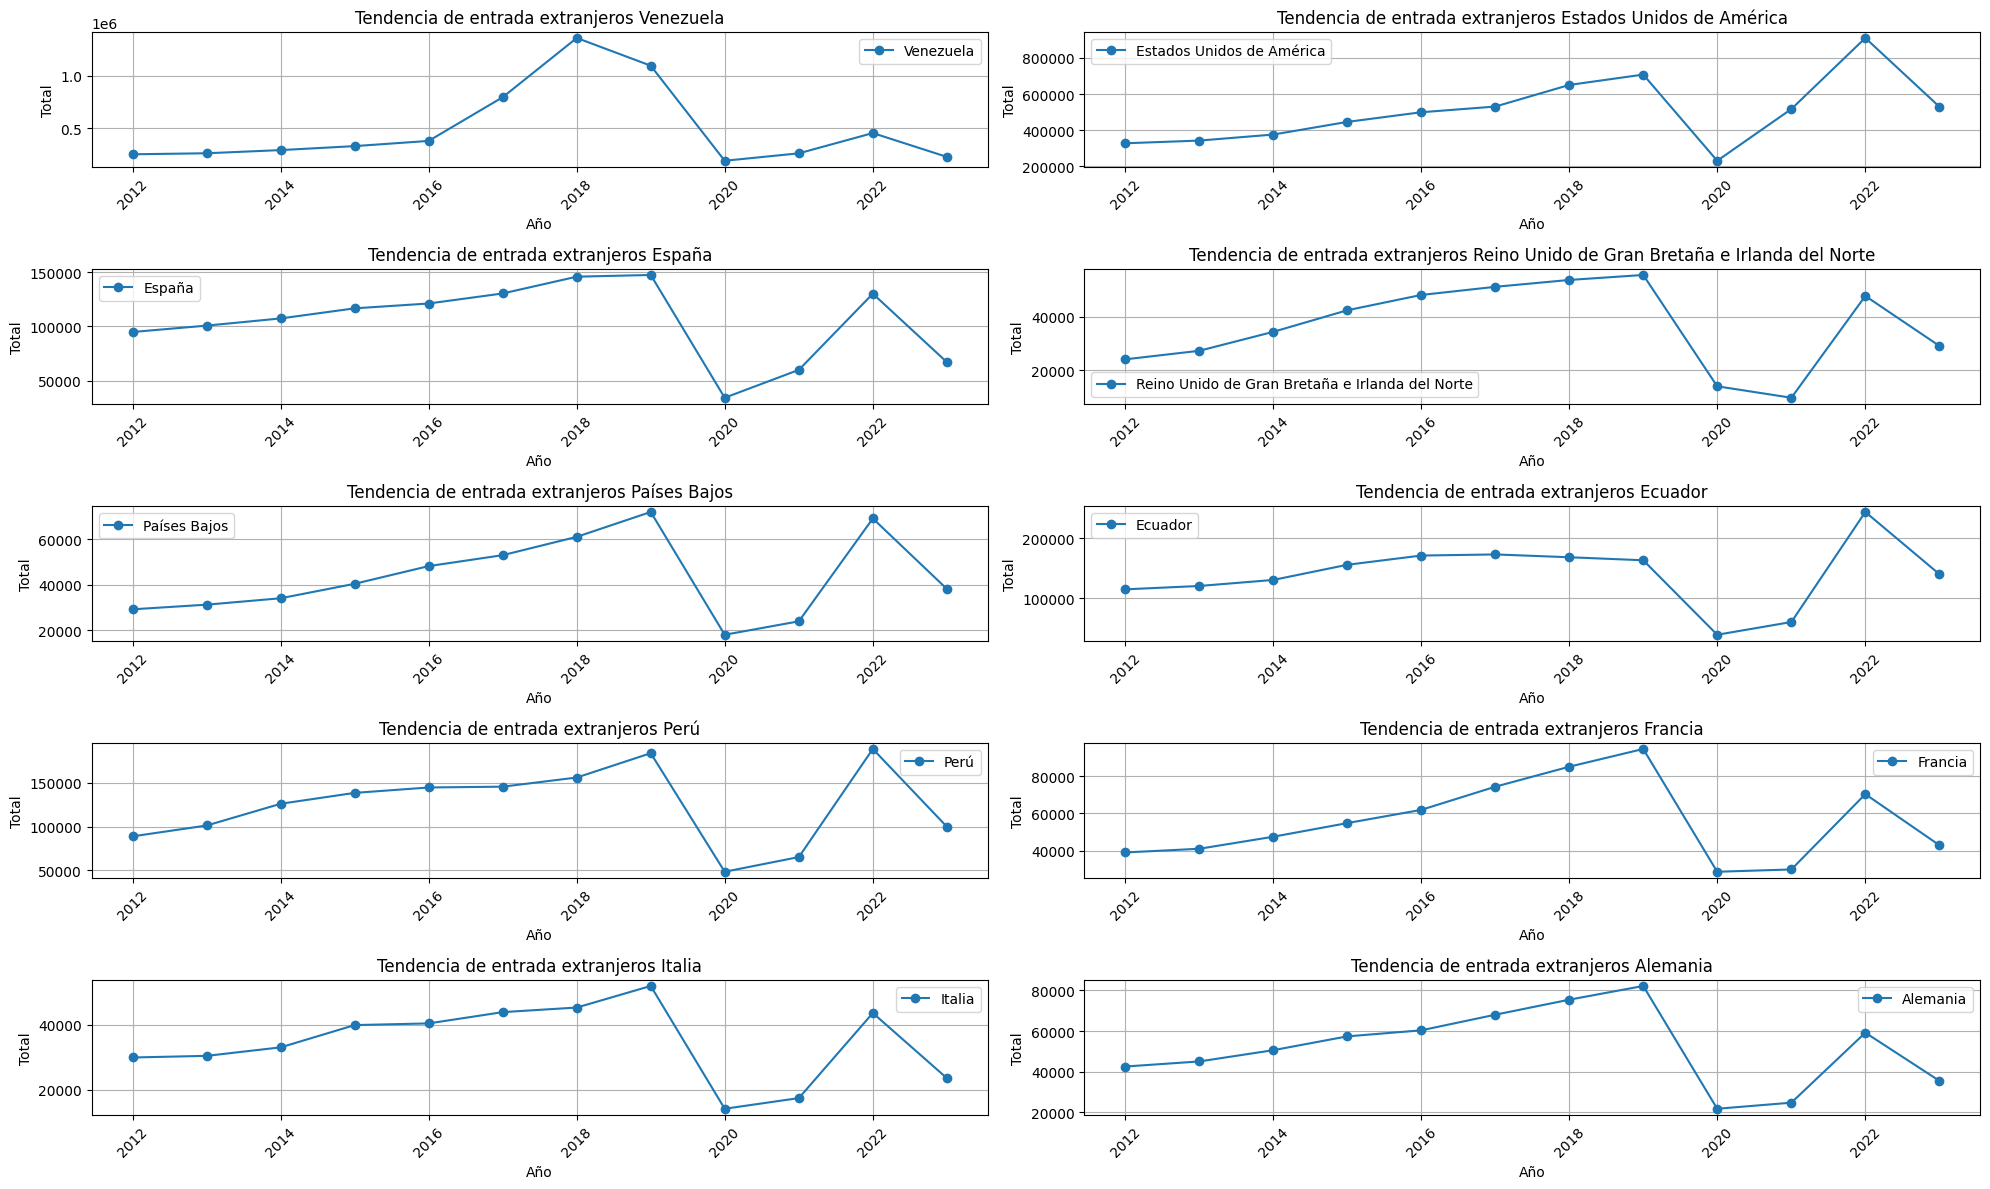

In [57]:
top_10_paises = df_renombrado['Nacionalidad'].value_counts().head(10).index

plt.figure(figsize=(20, 12))

for i, pais in enumerate(top_10_paises, 1):
    pais_data = df_renombrado[df_renombrado['Nacionalidad'] == pais].copy()
    pais_data.loc[:, 'Año'] = pd.to_datetime(pais_data['Año'], format='%Y')
    tendencias_pais = pais_data.groupby('Año')['Total'].sum().reset_index()
# Subgráfica individual para cada país
    plt.subplot(5, 2, i)
    plt.plot(tendencias_pais['Año'], tendencias_pais['Total'], marker='o', linestyle='-', label=pais)
    plt.title(f'Tendencia de entrada extranjeros {pais}')
    plt.xlabel('Año')
    plt.ylabel('Total')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
plt.tight_layout()
plt.show()

# Comparación entre las 10 primeras Nacionalidades con mas frecuencia de ingreso
- Se muestra una tendencia de incremento en la mayoría de Extranjeros hasta el año 2019, a excepción de los provenientes de Ecuador que se mantuvo estable entre los años 2016 y 2019
- El ingreso de extranjeros en su totalidad se ven afectados en 2020 al caer por restricciones de Pandemia.
- Hay recuperación de ingreso en los ultios tiempos de la mayoria de naciones, excepto los Venezolanos

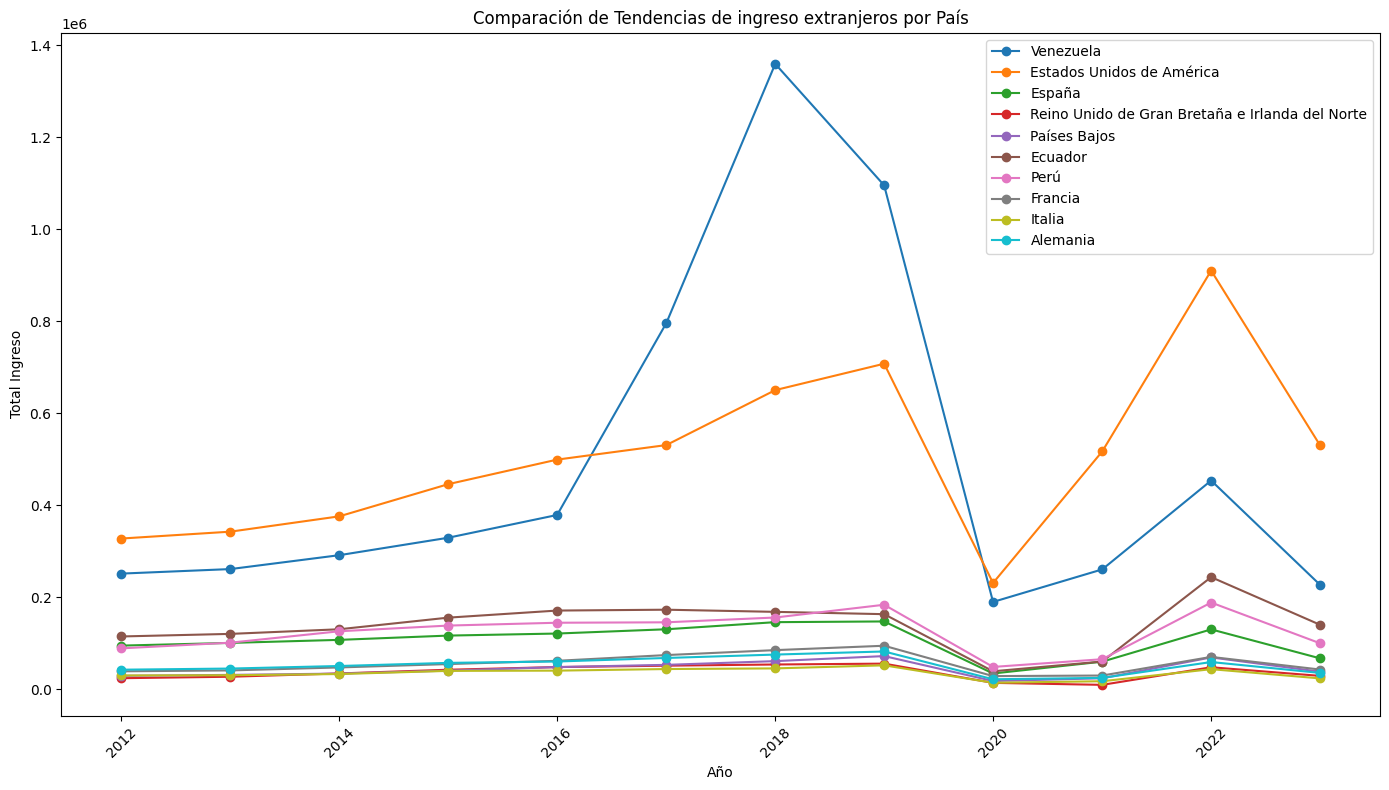

In [59]:
plt.figure(figsize=(14, 8))
for pais in top_10_paises:
    pais_data = df_renombrado[df_renombrado['Nacionalidad'] == pais]
    tendencias_pais = pais_data.groupby('Año')['Total'].sum().reset_index()
    plt.plot(tendencias_pais['Año'], tendencias_pais['Total'], marker='o', linestyle='-', label=pais)
plt.title('Comparación de Tendencias de ingreso extranjeros por País')
plt.xlabel('Año')
plt.ylabel('Total Ingreso')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comparativo entre los primeras 10 Nacionalidades de extranjeros en una gráfica
- Los venezolanos sobresalen entre los años 2018 y 2019, Probablemente por Exodo masivo e Hiperinflación que llevó al abandono de su país migrando a naciones mas cercanas.
- Los Estadounidenses son el segundo país con mas frecuencia de ingreso que sigue en constante crecimiento entendiendo que hubo afectacion en 2020
- Todas las naciones fueron afectadas en 2020 por Covid-19

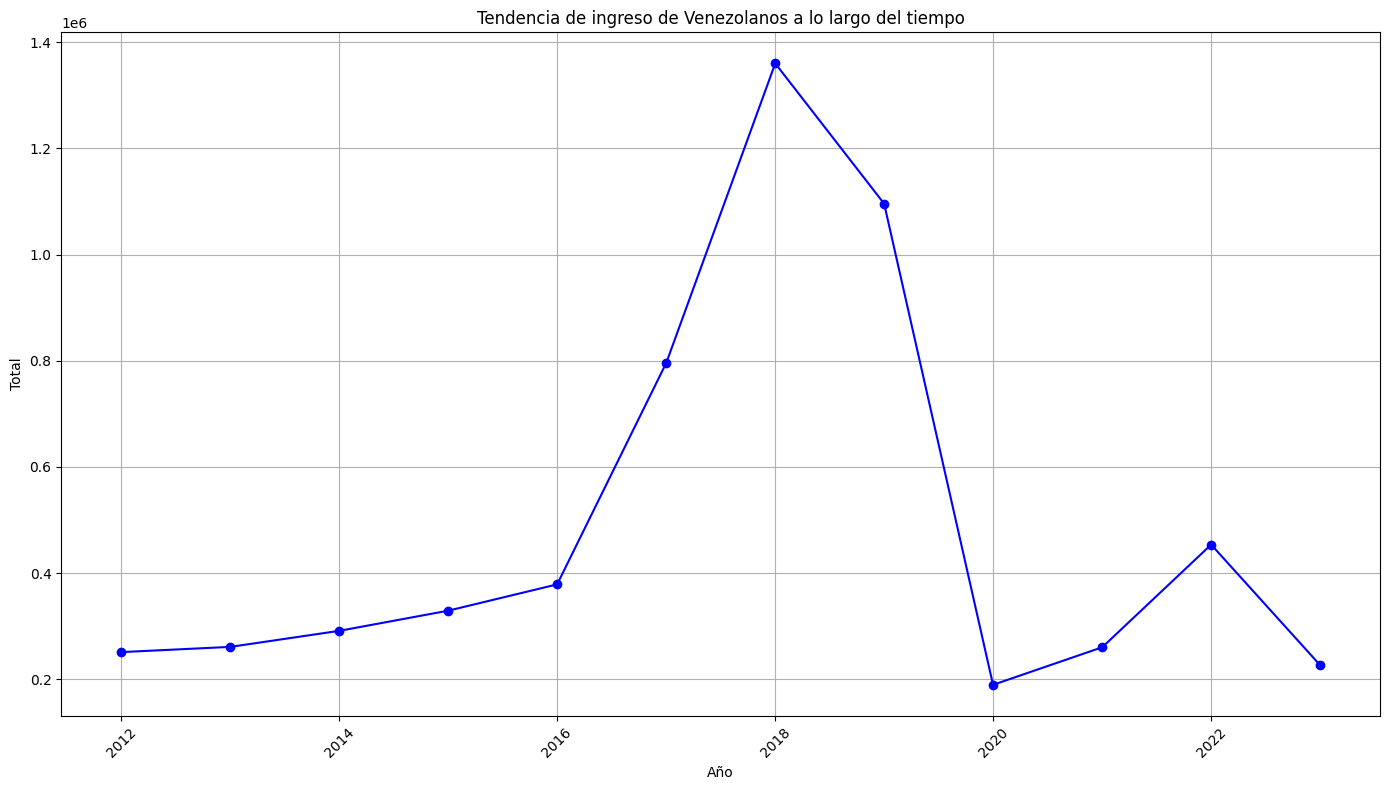

In [60]:
venezuela_data = df_renombrado[df_renombrado['Nacionalidad'] == 'Venezuela'].copy()
venezuela_data.loc[:, 'Año'] = pd.to_datetime(venezuela_data['Año'], format='%Y')
tendencias_venezuela = venezuela_data.groupby('Año')['Total'].sum().reset_index()
plt.figure(figsize=(14, 8))
plt.plot(tendencias_venezuela['Año'], tendencias_venezuela['Total'], marker='o', linestyle='-', color='b')
plt.title('Tendencia de ingreso de Venezolanos a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Total')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ingreso de Venezolanos a Colombia
- Con la Crisis en Venezuela desde el año 2016 al 2018 practicamente duplica cada año la llegada al país, en el año 2019 tiene una leve caida pero casi triplica con respecto al 2016.
- Entre los años anteriores al 2016 su frecuencia estaba entre los 200.0000 a 400.000 , notablemente hubo afectación por Gobierno.
- Para los años 2021 al 2023 vuelve a elevarse la cifra de ingreso, sobrepasando los años 2016, tendiendo a la normalidad, esto puede ser por radicación venezolna en Colombia, puesto que el gobierno no ha cambiado aún y tal vez tratar de usar el territorio colombiano como paso hacia otras naciones.

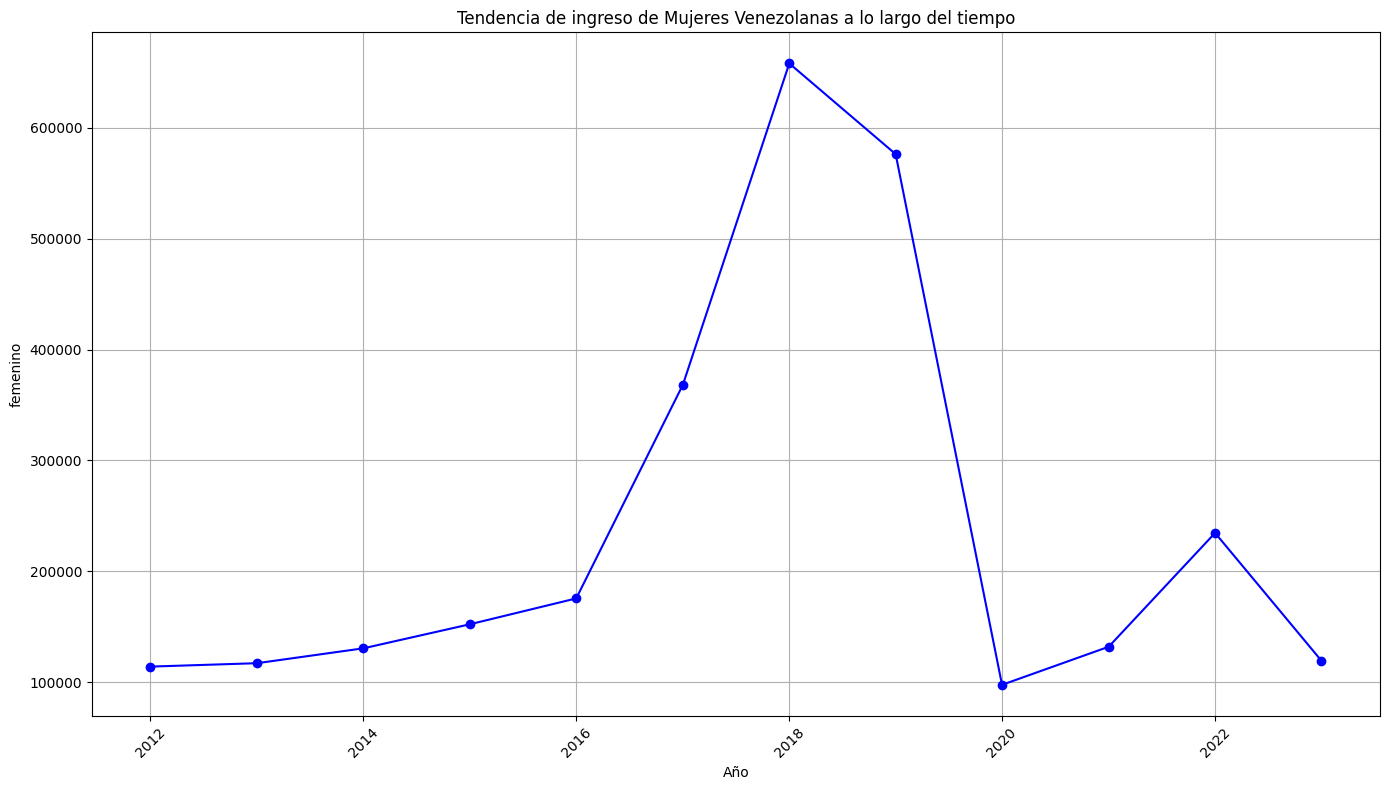

In [61]:
venezuelaF_data = df_renombrado[df_renombrado['Nacionalidad'] == 'Venezuela'].copy()
venezuelaF_data.loc[:, 'Año'] = pd.to_datetime(venezuelaF_data['Año'], format='%Y')
tendencias_venezuelaF = venezuelaF_data.groupby('Año')['Femenino'].sum().reset_index()
plt.figure(figsize=(14, 8))
plt.plot(tendencias_venezuelaF['Año'], tendencias_venezuelaF['Femenino'], marker='o', linestyle='-', color='b')
plt.title('Tendencia de ingreso de Mujeres Venezolanas a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('femenino')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

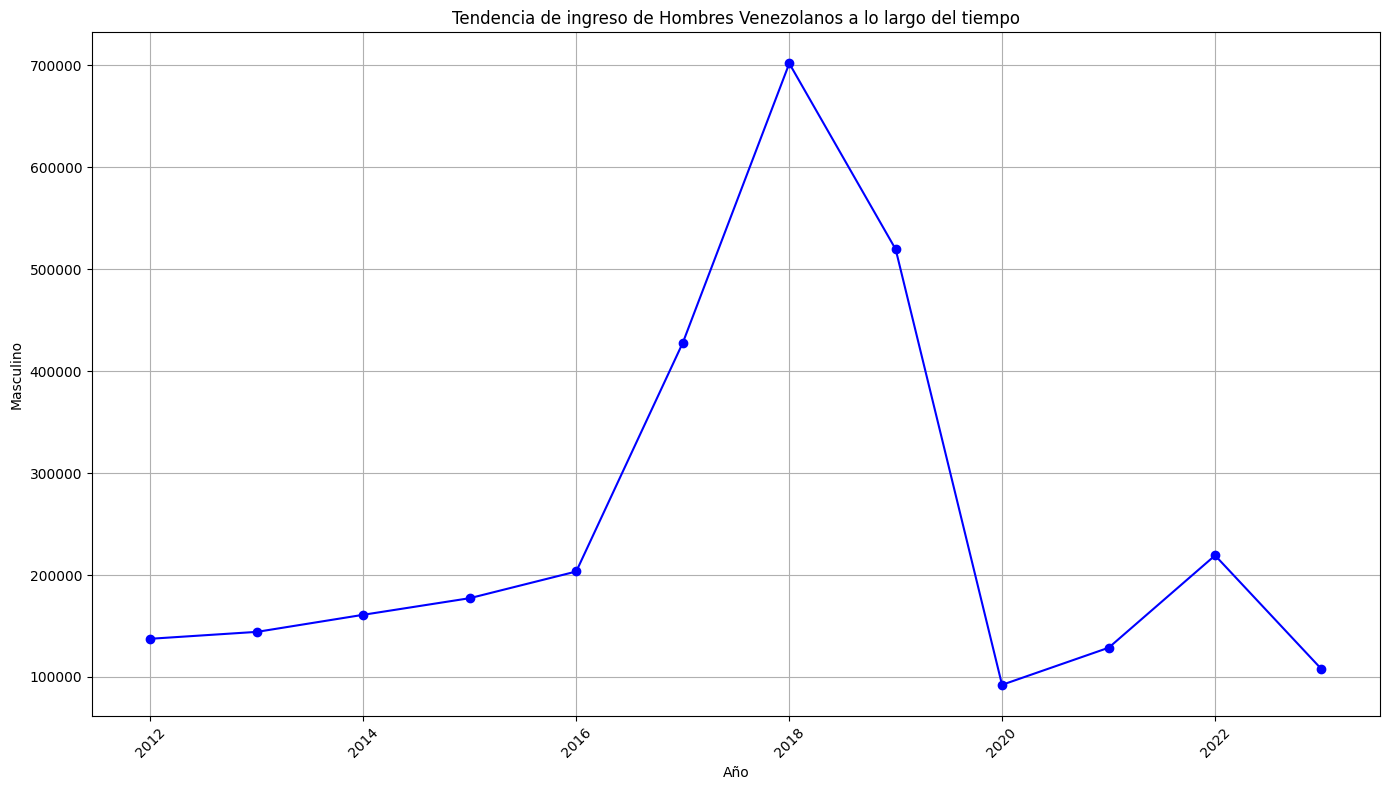

In [62]:
venezuelaM_data = df_renombrado[df_renombrado['Nacionalidad'] == 'Venezuela'].copy()
venezuelaM_data.loc[:, 'Año'] = pd.to_datetime(venezuelaM_data['Año'], format='%Y')
tendencias_venezuelaM = venezuelaM_data.groupby('Año')['Masculino'].sum().reset_index()
plt.figure(figsize=(14, 8))
plt.plot(tendencias_venezuelaM['Año'], tendencias_venezuelaM['Masculino'], marker='o', linestyle='-', color='b')
plt.title('Tendencia de ingreso de Hombres Venezolanos a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Masculino')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graficas de Ingreso por género Femenino y Masculino de Venezuela
- Hay una similar llegada entre los dos Sexos, puede significar que estaría vinculadas familias en el exodo.
- El problema de la nación de Venezuela afecta a toda tanto mujeres como hombres

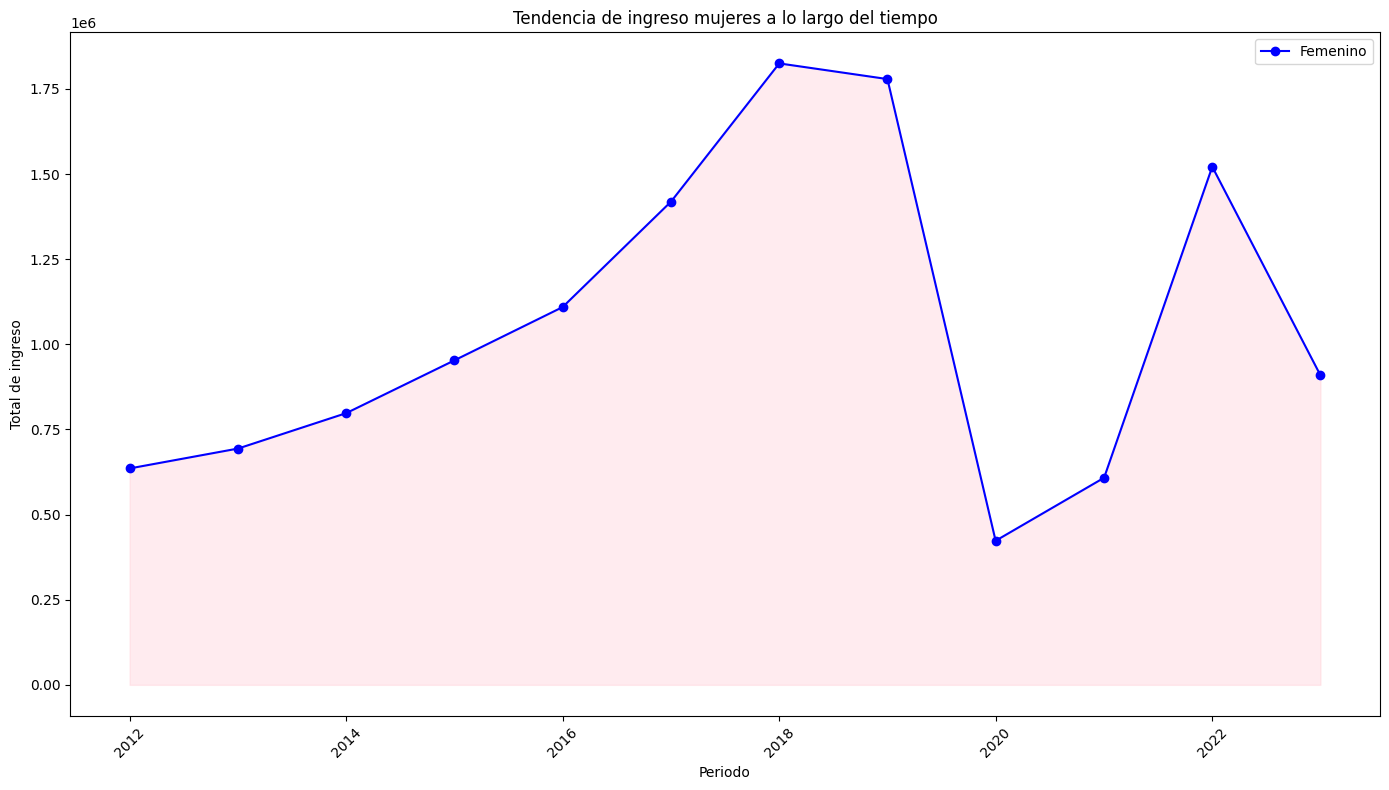

In [63]:
df_renombrado['Año'] = pd.to_datetime(df_renombrado['Año'], format='%Y')
tendencias_temporales = df_renombrado.groupby('Año')['Femenino'].sum().reset_index()

plt.figure(figsize=(14, 8))
plt.plot(tendencias_temporales['Año'], tendencias_temporales['Femenino'], marker='o', linestyle='-', color='blue', label='Femenino')

plt.fill_between(tendencias_temporales['Año'], tendencias_temporales['Femenino'], color='pink', alpha=0.3)

plt.title('Tendencia de ingreso mujeres a lo largo del tiempo')
plt.xlabel('Periodo')
plt.ylabel('Total de ingreso')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

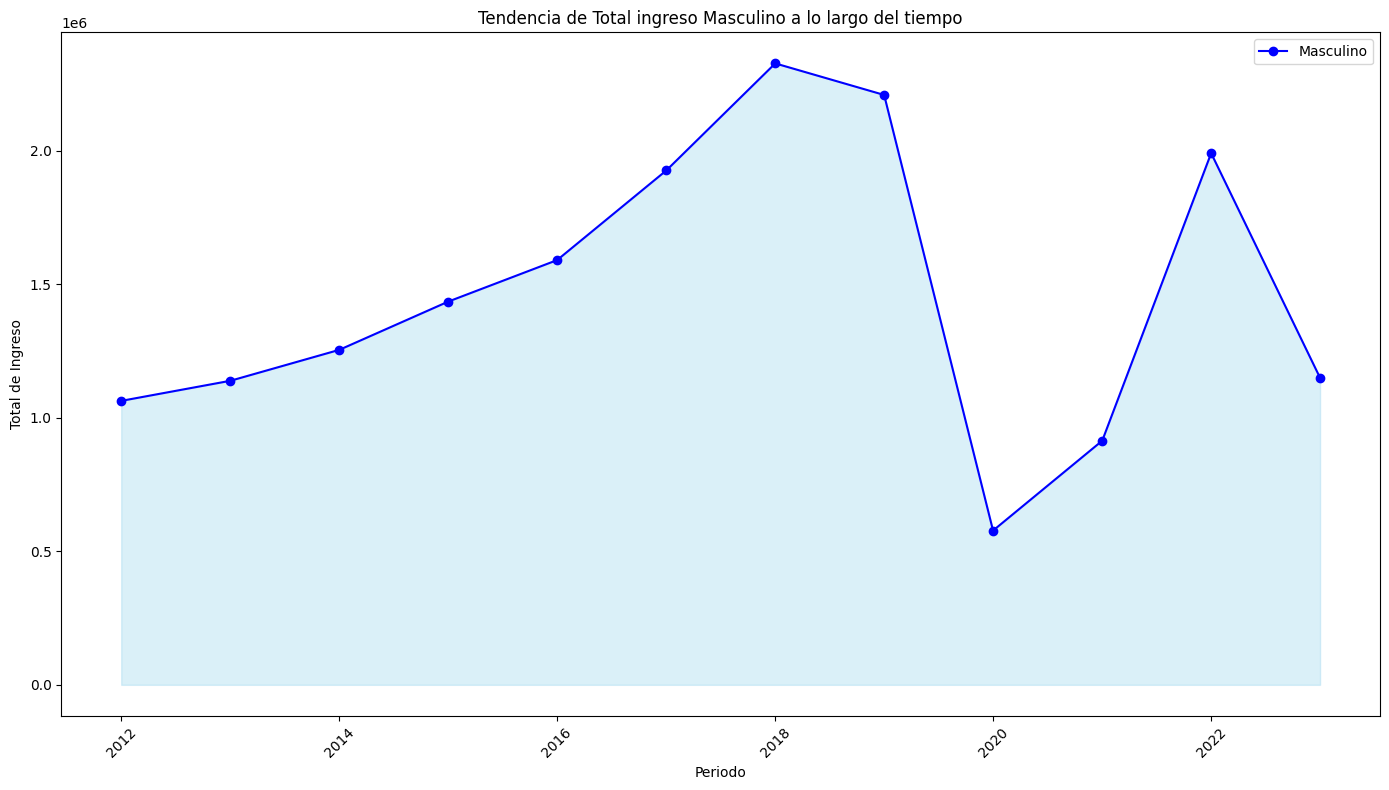

In [64]:
df_renombrado['Año'] = pd.to_datetime(df_renombrado['Año'], format='%Y')
tendencias_temporales = df_renombrado.groupby('Año')['Masculino'].sum().reset_index()

plt.figure(figsize=(14, 8))
plt.plot(tendencias_temporales['Año'], tendencias_temporales['Masculino'], marker='o', linestyle='-', color='blue', label='Masculino')

plt.fill_between(tendencias_temporales['Año'], tendencias_temporales['Masculino'], color='skyblue', alpha=0.3)


plt.title('Tendencia de Total ingreso Masculino a lo largo del tiempo')
plt.xlabel('Periodo')
plt.ylabel('Total de Ingreso')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tendencia de Ingreso por genero de Extranjeros a Colombia
- Observamos que son similares la entrada en frecuencia tanto de mujeres como de hombres.
- Es mas alto el flujo de hombres que de mujeres a la Nacion Colombiana